# Random forest
---
### 1. Arbres de décision

#### 1.1 Introduction
Pour toute la suite de cette partie, on se concentrera uniquement sur les arbres de décision binaire pour la classification. Il existe des arbres de classification multiclasses qui ne sont pas détaillés dans cette partie. Les arbres de décision pour la régression sont détaillés dans la partie *Regression Trees*.

Introduits par Brieman et Al. en 1984 sous le nom de CART (Classification And Regression Trees), les arbres de décision binaires sont des DAG (graphes acycliques orientés) qui permettent de classer différentes features en fonction de leurs caractéristiques. Pour des arbres de décision utilisés pour la classification, le but est de séparer l'espace des features par des hyperpavés afin de séparer les classes. Voici un exemple d'arbre de décisions binaire qui vise à déterminer le risque d'avoir une crise cardiaque en fonction des variables d'entrées $(poids, âge, fumeur)$  

<div align="center">
  <img src="src/pics/RandomForest/DecisonTree.png" alt="a" width="750" height="500">
</div>

#### 1.2 Construction des arbres de décision

**Arbres de régression**

On prend un dataset $\mathcal{D} = (y, X_1, \dots, X_j) = \{ (y_1, (x_{1,1}, \dots, x_{1,j})), \dots, (y_n, (x_{n,1}, \dots, x_{n,j})) \}$ 
avec 

* $y = (y_1, \dots, y_n) \in \mathbb{R}^n$
* $X_j = (x_{1,j} \dots, x_{n,j}) \in \mathbb{R}^n, j \in \mathbb{N}^{*}$.

On souhaite découper l'espace des features ($\mathbb{R}^{n}$) en $M$ partitions (i.e. régions) $(R_m)_{m \in \{ 1,M \}}$. **Le modèle de régression n'associe pas ici une classe mais une valeur pour chaque régions** (i.e. $\forall m \in \{ 1,M \}, \quad R_m = c_m \in \mathbb{R}$). La fonction de décision est alors la suivante : 

$$
f(x) = \sum_{m=1}^{M}c_m \mathbb{1}_{\{x \in R_m\}}
$$

Avec $\mathbb{1}(\bullet)$ la fonction indicatrice. $\mathbb{1}_{x \in \mathcal{A}}(x) = 1 \quad \text{si} \quad x \in \mathcal{A}, 0$ sinon. $\mathbb{1}_{ \{\ \bullet \} }(x) = 1 \quad \text{si} \quad (\bullet)$ est respecté, 0 sinon. Cette fonction minimise le risque empirique avec la fonction de perte $l_2$ ($L(y_i,\hat{y_i}) = (y_i - \hat{y_i})²$) tel que le problème de régression devient le problème d'optimisation suivant :

$$
\begin{alignat}{3}
\min_{(c_{m})_{m \in \{ 1,M \}}} \mathcal{R}_n(f) &= \min_{(c_m)_{m \in \{ 1,M \}}} \mathbb{E}(L(y_i,\hat{y_i})) \\
                                                  &= \min_{(c_m)_{m \in \{ 1,M \}}} \frac{1}{n} \sum_{i=1}^{n}L(y_i,\hat{y_i}) \\
                                                  &= \min_{(c_m)_{m \in \{ 1,M \}}} \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y_i})² \\
                                                  &= \min_{(c_m)_{m \in \{ 1,M \}}} \frac{1}{n} \sum_{i=1}^{n}(y_i - f(x_i))²
\end{alignat}
$$

La solution de ce problème est obtenue en appliquant le gradient à la fonction à minimiser; on cherche alors $\nabla \frac{1}{n} \sum_{n=1}^{n}(y_i - f(x_i))² = 0$ soit : 

$$
\begin{alignat}{3}
\hat{c_{m}} &= \text{ave}(y_i | x_i \in R_m) \quad \forall m \in \{ 1,M \} \\
            &= \frac{1}{|R_m|}\sum_{i, x_i \in R_m} y_i \quad \forall m \in \{ 1,M \} \\
            &=\frac{\sum_{i=1}^{n} y_i \mathbb{1}_{\{x \in R_m\}}} {\sum_{i=1}^{n} \mathbb{1}_{\{x \in R_m\}}}, \quad \forall m \in \{ 1,M \}
\end{alignat}
$$

ou $\hat{c_{m}}$ est l'estimateur empirique de la valeur $c_m$ au regard des données d'entrée pour la région $R_n$ et $\text{ave}$ est la fonction *average*. $|R_m| = \sum_{x_i \in R_m}\mathbb{1}_{\{x_i \in R_m \}}$ est le nombre d'observations dans la région $m$. En revanche, choisir la meilleure séparation de partitions $R_m$ est souvent infaisable de manière optimale. Pour cela, on utilise un algortihme glouton qui se comporte de la manière suivante :

On considère $j$ une variable de séparation et $s$ un point de séparation. Au départ, l'espace tout entier n'est pas séparé. L'expression des deux hyperplans de telle sorte que l'espace tout entier soit séparé s'écrit de la mainère suivante : 

$$
R_1(j,s) = \{ x_i \in \mathcal{D} : x_{i,j} <= s\}, \quad R_2(j,s) = \{ x_i \in \mathcal{D} : x_{i,j} > s\}
$$

On chercher alors à minimiser l'expression suivante sur le couple $(j,s)$ :

$$
\min_{j,s} (\min_{x_i \in R_1(j,s)}{\sum_{x_{i} \in R_{1}(j,s)} (y_{i} - c_{1})²} + \min_{x_i \in R_2(j,s)}{\sum_{x_i \in R_{2}(j,s)} (y_{i} - c_{2})²})
$$

La solution de ce problème d'optimisation est alors : 

$$
\hat{c_1} = \text{ave}(y_i | x_i \in R_1(j,s)), \quad \hat{c_2} = \text{ave}(y_i | x_i \in R_2(j,s))
$$
**Arbres de classification**



#### 1.3 Exemples

**En dimension 2**

Prenons un dataset $\mathcal{D} = (y, X_1, X_2) = \{ (y_1, (x_{1,1}, x_{n,2})), \dots, (y_n, (x_{n,1}, x_{n,2})) \}$ 
avec $y = (y_1, \dots, y_n) \in \mathbb{R}^n$, $x_j = (x_{1,j} \dots, x_{n,j}) \in \mathbb{R}^n, j \in \{1,2\}$. On souhaite séparer l'espace (i.e. le plan $(x_1, x_2)$) en $k$ rectangles de telle sorte à avoir des zones bien définies pour séparer les classes.

1. On commmence par séparer l'espace en deux à une frontière définie par l'équation de droite $x_1=t_1$. Si $x_1 <= t_1$, on en dans la zone de la classe 1, appelée $R_1$. $R_2$ sinon.
2. Si $x_1 <= t_1$, on re-découpe la zone 1 en deux avec la droite d'équation $x_2 = t_2$. Si $x_2 <= t_2$, on est dans $R_3$, $R_4$ sinon.
3. 2. Si $x_1 > t_1$, on re-découpe la zone 2 ($R_2$) en deux avec la droite d'équation $x_2 = t_3$. Si $x_2 <= t_3$, on est dans $R_5$, $R_6$ sinon.
4. On répète cce processus de sorte à avoir $k$ séparations de l'espace (profondeur de l'arbre)

<div align="center">
  <img src="src/pics/RandomForest/Regions.png" alt="a" width="350" height="150">
</div>

<div align="center">
  <img src="src/pics/RandomForest/decision_tree_2d.gif" alt="a" width="350" height="150">
</div>

### 2. Forêts aléatoires
#### 2.1 Formulation mathématique des random forests

Une random forest est un regrouppement de plusieurs arbres de décision entraînés sur des datasets différents. Ces datasets sont générés grâce au bagging sur le dataset initial. Les noeuds sont créés par sélection aléatoire d'une des features du dataset. Pour la classification, on prend le vote majoritaire. Pour la régression, on prend la moyenne des valeurs renvoyées par l'ensemble des arbres. L'image suivante montre une comparaison entre le bagging et le boosting (voir 6. Boosting)

<div align="center">
  <img src="src/pics/RandomForest/BaggingVSBoosting.png" alt="a" width="600" height="300">
</div>

1. **Construction d'une forêt aléatoire**

On génère plusieurs jeux de données d'entraînement en effectuant un tirage aléatoire avec remise dans le dataset initial noté $\mathbb{D}_{i}$. On note $\mathcal{D}$ l'ensemble des jeux de données issu du boostrap :

$$
\mathcal{D} = \{ (D_{i})_{i \in \mathbb{N}} \} = \{ (Y, (X_{i})_{i \in \mathbb{N}})\}
$$

Pour chaque $(D_{i})_{i \in \mathbb{N}} \in \mathcal{D}$, on construit un arbre de décision $T_{i}$.

2. **Sélection des variables**

Pour chaque arbres, on re-sélectionne uniquement un sous-ensemble des variables tirées aléatoirement à chaque noeud des arbres, basé sur une sélection avec des critères de séparation comme leurs entropie ou le critère de Gini.

3. **Prise de décision**

Chaque arbre $T_{i}$ prédit une classe $\hat{y}_{i} \in \mathbb{R}$. La méthode de sélection de la classe dépend du type de problème que l'on veut résoudre : une classification ou une régression. Si c'est une classification, on cherche à avoir la classe majoritaire tandis que pour un problème de régression, on cherche à avoir la moyenne des $\hat{y_i}$.

### 2.2 Random forest en classification

$$
\hat{y} = mode \{\hat{y_{1}}, ..., \hat{y_{n}} \}
$$

ou $mode$ désigne la fonction modale qui retourne l'estimateur le plus fréquement rencontré dans l'ensemble des estimateurs. On peut récrire cette fonction comme ceci :

$$
mode(X) = max(count((x_{i})_{i \in \mathbb{N}}))
$$

Exemple : $mode({1,1,2,3,2,2,2,4,1}) = 2$

### 2.3 Random forest en régression

$$
\hat{y} = \frac{1}{N}\sum_{i = 1}^{N}\hat{y_{i}}
$$

#### 2.4 Métriques pour la random forest

Pour la classification : 

accuracy_score, f1_score, roc_auc, confusion_matrix

Pour la régression :

r2_score, mean_squared_error, mean_absolute_error


### 2.5 Entraînement d'une random forest

**Classification**

<div align="center">
  <img src="src/pics/RandomForest/random_forest_classification_evolution.gif" alt="a" width="600" height="300">
</div>

L'ensemble des arbres de décision retournent le même résultat que l'animation sur un dataset généré aléatoirement (partie sur les arbres de décision). La random forest prend en compte l'ensemble de ces résultats et garde les régions les plus retournées par la forêt. 

**Regression**

<div align="center">
  <img src="src/pics/RandomForest/random_forest_regression_evolution.gif" alt="a" width="600" height="300">
</div>

Parmis toutes les valeurs possibles de la prédiction (nuage de points généré par les prédictions de chacun des arbres), la random forest retourne le résultat le plus probable qui correspond à la valeur la plus retournée par chacun des arbres de la forêt.  

## 3 Des exemples en Python
---
#### 3.1 Import des librairies

In [1]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier                   # pour classification
from sklearn.ensemble import RandomForestRegressor                    # pour régression
from sklearn.datasets import load_iris, fetch_california_housing      # exemple de dataset : iris poour la classification, fetch_california_housing pour la régression
from sklearn.model_selection import train_test_split, GridSearchCV    
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, f1_score, confusion_matrix, classification_report

#### 3.2 Import des données
On reprend le jeu de données iris.

In [2]:
data = load_iris()

df = pd.DataFrame(data.data, columns = data.feature_names)
df["target"] = data.target

X = data.data # Features
y = data.target # Classes

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 3.3 Séparation des données de test et d'entraînement

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 3.4 Entraînement du modèle
Ici, on génère une pipeline pour les cas ou on prend une random forest pour la régression et une autre pour la classification. 

* Le problème de classification se fait sur la prédiction d'une espèce sur le dataset iris
* Le problème de régression se fera sur ........

**Pipeline pour la RandomForestClassifier**

Pour le dataset Iris, la pipeline est la suivante : on réalise une GridSearch pour trouver les paramètres optimaux de la *RandomForestClassifier* avec une *cross-validation* à 5 folds pour améliorer les scores. Avant d'entraîner les différentes forêts, on normalise les données. Cette étape n'est pas obligatoire dans notre cas car on n'utilise uniquement des random forests, insensibles à la l'échelle des données puisque le modèle n'est pas basé sur l'évaluation de distances mais recommandée si on souhaite comparer d'autres modèles qui évaluent des distances comme la régression logistique ou les SVM (ou régression linéaire et/ou SVR pour les problèmes de régression). La pipeline peut se représenter de la manière suivante :

<pre>
for parameters in GridSearch:
    Normalization   # StandardScaler
    Modélization    # RandomForestClassifier
    fold in folds : # 4 folds 
        Fit         # Train
    validation      # On the 5th fold
    mean(scores)    # for each folds
final_eval          # on the best RandomForestClassifier
</pre>

In [4]:
# ------------- Init -------------
pipe = Pipeline([
    ('scaler', StandardScaler()),          # Normalisation
    ('rf', RandomForestClassifier(         # Modèle
        random_state=0,                    # seed
        verbose=True
    )) 
]) 

param_grid = {
    'rf__n_estimators': range(100, 200, 20),       # Nombre d'arbres
    'rf__max_depth': [None, 10, 20, 30, 50, 100],  # Profondeur maximale des arbres [None : pas de limites]
    'rf__min_samples_split': [2, 5, 10],           # Nombre d'échantillons pour scinder un noeud
}

scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro'
}

grid_search = GridSearchCV(
    estimator=pipe,         # Pipeline Standadization + model
    param_grid=param_grid,  # Params
    cv=5,                   # Cross-validation
    scoring=scoring,        # Metrics
    refit='accuracy',       # Model selection by specific metric
    n_jobs=-1,              # CPU cores usage (all)
    verbose=2               # verbose
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 

,estimator,Pipeline(step...rbose=True))])
,param_grid,"{'rf__max_depth': [None, 10, ...], 'rf__min_samples_split': [2, 5, ...], 'rf__n_estimators': range(100, 200, 20)}"
,scoring,"{'accuracy': 'accuracy', 'f1_macro': 'f1_macro', 'precision_macro': 'precision_macro', 'recall_macro': 'recall_macro'}"
,n_jobs,-1
,refit,'accuracy'
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


#### 3.5 Extraction du meilleur modèle
Après avoir entraîné plusieurs modèlles, on en extrait le meilleur grâce au GridSearch

In [5]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__min_samples_split,param_rf__n_estimators,params,split0_test_accuracy,split1_test_accuracy,...,std_test_precision_macro,rank_test_precision_macro,split0_test_recall_macro,split1_test_recall_macro,split2_test_recall_macro,split3_test_recall_macro,split4_test_recall_macro,mean_test_recall_macro,std_test_recall_macro,rank_test_recall_macro
0,0.150153,0.006731,0.019574,0.008600,None,2,100,"{'rf__max_depth': None, 'rf__min_samples_split...",0.952381,0.904762,...,0.031138,1,0.952381,0.916667,0.910714,1.0,0.952381,0.946429,0.031944,1
1,0.203292,0.066159,0.015308,0.001720,None,2,120,"{'rf__max_depth': None, 'rf__min_samples_split...",0.952381,0.904762,...,0.031138,1,0.952381,0.916667,0.910714,1.0,0.952381,0.946429,0.031944,1
2,0.215325,0.028865,0.017482,0.001544,None,2,140,"{'rf__max_depth': None, 'rf__min_samples_split...",0.952381,0.904762,...,0.031138,1,0.952381,0.916667,0.910714,1.0,0.952381,0.946429,0.031944,1
3,0.230567,0.015536,0.017441,0.000780,None,2,160,"{'rf__max_depth': None, 'rf__min_samples_split...",0.952381,0.904762,...,0.031138,1,0.952381,0.916667,0.910714,1.0,0.952381,0.946429,0.031944,1
4,0.266775,0.024070,0.018050,0.000296,None,2,180,"{'rf__max_depth': None, 'rf__min_samples_split...",0.952381,0.904762,...,0.031138,1,0.952381,0.916667,0.910714,1.0,0.952381,0.946429,0.031944,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.148373,0.008763,0.013510,0.000200,100,10,100,"{'rf__max_depth': 100, 'rf__min_samples_split'...",0.952381,0.904762,...,0.031138,1,0.952381,0.916667,0.910714,1.0,0.952381,0.946429,0.031944,1
86,0.174425,0.005107,0.015127,0.000693,100,10,120,"{'rf__max_depth': 100, 'rf__min_samples_split'...",0.952381,0.904762,...,0.031138,1,0.952381,0.916667,0.910714,1.0,0.952381,0.946429,0.031944,1
87,0.207502,0.012553,0.016025,0.000153,100,10,140,"{'rf__max_depth': 100, 'rf__min_samples_split'...",0.952381,0.904762,...,0.031138,1,0.952381,0.916667,0.910714,1.0,0.952381,0.946429,0.031944,1
88,0.220923,0.008952,0.011437,0.002539,100,10,160,"{'rf__max_depth': 100, 'rf__min_samples_split'...",0.952381,0.904762,...,0.031138,1,0.952381,0.916667,0.910714,1.0,0.952381,0.946429,0.031944,1


Etant donné que ce dataset est relativement simple, les modèles donnent tous le même score. Pour un dataset plus compliqué, le résultat ne serait pas le même. Pour un résultat plus visuel, on affiche la valeur des 20 modèles les plus performants en fonction des différentes métriques et de leurs score.

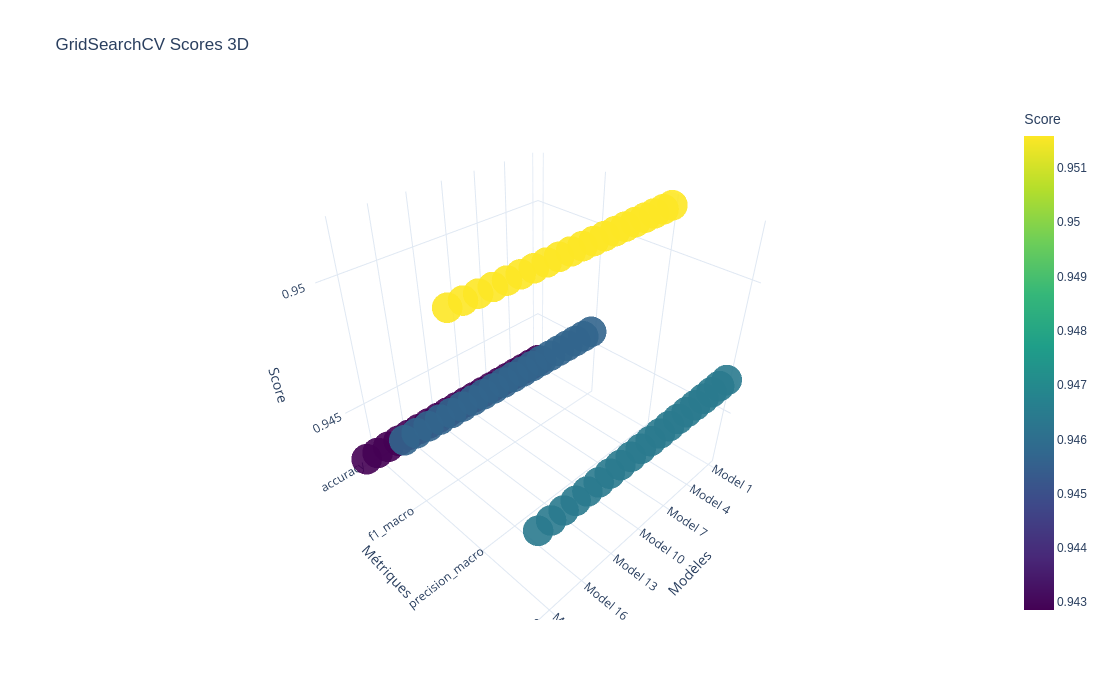

In [6]:
top_n=20
df = pd.DataFrame(grid_search.cv_results_)

# Récupérer les métriques
metrics = [col.replace('mean_test_', '') for col in df.columns if col.startswith('mean_test_')]
if not metrics:
    raise ValueError("Aucune métrique trouvée dans cv_results_.")

# Trier par meilleure métrique principale
main_metric = metrics[0]
df = df.sort_values(f'mean_test_{main_metric}', ascending=False).head(top_n)

# Labels modèles
model_labels = [f"Model {i+1}" for i in range(len(df))]
df['hover_text'] = df['params'].apply(lambda p: ', '.join(f"{k}={v}" for k,v in p.items()))

# Construire X, Y, Z
x, y, z, text, color = [], [], [], [], []
for i, metric in enumerate(metrics):
    for j in range(len(df)):
        x.append(model_labels[j])
        y.append(metric)
        z.append(df[f'mean_test_{metric}'].iloc[j])
        text.append(df['hover_text'].iloc[j])
        color.append(df[f'mean_test_{metric}'].iloc[j])

fig = go.Figure(data=[go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(
        size=10,
        color=color,
        colorscale='Viridis',
        colorbar=dict(title='Score'),
        opacity=0.9
    ),
    text=text,
    hovertemplate='Model: %{x}<br>Métrique: %{y}<br>Score: %{z:.3f}<br>Params: %{text}<extra></extra>'
)])

fig.update_layout(
    title="GridSearchCV Scores 3D",
    scene=dict(
        xaxis_title='Modèles',
        yaxis_title='Métriques',
        zaxis_title='Score',
    ),
    template='plotly_white',
    height=700
)

fig.show()

Récupération du meilleur modèle 

In [11]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [12]:
best_model

,steps,"[('scaler', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [13]:
best_params

{'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}

In [14]:
best_score

0.9428571428571428

C'est l'accuracy score initialisé dans le grid search

#### 3.6 Prédictions

In [15]:
y_pred = best_model.predict(X_test) # Prédicitons sur les données de test

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


#### 3.7 Evaluation des performances du modèle

In [16]:
f1_score(y_test, y_pred, average='macro')

1.0

In [17]:
accuracy_score(y_test, y_pred)

1.0

In [18]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



---
**On peut faire la même chose pour la régression**

Ici, on utilise le dataset california_housing. Import du modèle et séparation $X_{train}$, $X_{test}$

In [20]:
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Entraînement du modèle :

In [21]:
# ------------- Init -------------
pipe = Pipeline([
    ('scaler', StandardScaler()),          # Normalisation
    ('rf', RandomForestRegressor(         # Modèle
        random_state=0,                    # seed
        verbose=True
    )) 
]) 

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
}

scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error',
    'neg_mae': 'neg_mean_absolute_error'
}

grid_search = GridSearchCV(
    estimator=pipe,         # Pipeline Standadization + model
    param_grid=param_grid,  # Params
    cv=5,                   # Cross-validation
    scoring=scoring,        # Metrics
    refit='r2',             # Model selection by specific metric
    n_jobs=-1,              # CPU cores usage (all)
    verbose=2               # verbose
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Do

,estimator,Pipeline(step...rbose=True))])
,param_grid,"{'rf__max_depth': [None, 10, ...], 'rf__min_samples_split': [2, 5], 'rf__n_estimators': [100, 200]}"
,scoring,"{'neg_mae': 'neg_mean_absolute_error', 'neg_mse': 'neg_mean_squared_error', 'r2': 'r2'}"
,n_jobs,-1
,refit,'r2'
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


Extraction du meilleur modèle de régression :

In [22]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__min_samples_split,param_rf__n_estimators,params,split0_test_r2,split1_test_r2,...,std_test_neg_mse,rank_test_neg_mse,split0_test_neg_mae,split1_test_neg_mae,split2_test_neg_mae,split3_test_neg_mae,split4_test_neg_mae,mean_test_neg_mae,std_test_neg_mae,rank_test_neg_mae
0,12.460845,0.180951,0.094862,0.003747,None,2,100,"{'rf__max_depth': None, 'rf__min_samples_split...",0.792316,0.808461,...,0.012190,6,-0.340319,-0.334512,-0.341221,-0.337477,-0.336992,-0.338104,0.002415,5
1,25.020142,0.410986,0.180748,0.006818,None,2,200,"{'rf__max_depth': None, 'rf__min_samples_split...",0.794040,0.809655,...,0.012210,2,-0.338044,-0.332142,-0.339361,-0.335154,-0.336343,-0.336209,0.002489,1
2,11.522966,0.251371,0.064113,0.003269,None,5,100,"{'rf__max_depth': None, 'rf__min_samples_split...",0.791860,0.806984,...,0.012316,8,-0.341174,-0.335460,-0.341408,-0.336875,-0.337114,-0.338406,0.002424,7
3,22.691304,0.341878,0.129404,0.010407,None,5,200,"{'rf__max_depth': None, 'rf__min_samples_split...",0.793506,0.808873,...,0.012180,3,-0.338529,-0.332720,-0.339720,-0.335201,-0.336696,-0.336573,0.002469,3
4,7.479711,0.058240,0.034787,0.001169,10,2,100,"{'rf__max_depth': 10, 'rf__min_samples_split':...",0.769698,0.781294,...,0.011829,11,-0.371934,-0.371159,-0.375282,-0.367622,-0.369966,-0.371193,0.002511,11
5,15.041672,0.169869,0.067494,0.004937,10,2,200,"{'rf__max_depth': 10, 'rf__min_samples_split':...",0.771182,0.782304,...,0.011369,10,-0.369979,-0.369294,-0.373323,-0.367058,-0.370081,-0.369947,0.002009,9
6,7.399334,0.051283,0.035103,0.004520,10,5,100,"{'rf__max_depth': 10, 'rf__min_samples_split':...",0.769808,0.781290,...,0.011683,12,-0.371983,-0.371024,-0.375561,-0.367788,-0.369907,-0.371252,0.002568,12
7,14.943347,0.127342,0.062678,0.000521,10,5,200,"{'rf__max_depth': 10, 'rf__min_samples_split':...",0.771462,0.782108,...,0.011197,9,-0.369893,-0.369571,-0.373514,-0.366993,-0.370126,-0.370019,0.002078,10
8,11.847582,0.087695,0.087956,0.006420,20,2,100,"{'rf__max_depth': 20, 'rf__min_samples_split':...",0.792892,0.807865,...,0.012077,5,-0.340523,-0.334762,-0.341553,-0.336735,-0.336952,-0.338105,0.002535,6
9,22.365076,0.555851,0.137948,0.003309,20,2,200,"{'rf__max_depth': 20, 'rf__min_samples_split':...",0.794119,0.809418,...,0.012108,1,-0.338110,-0.332414,-0.339728,-0.335175,-0.336642,-0.336414,0.002508,2


Avec un dataset plus complexe, on arrive à avoir des varioations sur les performances en fonction des paramètres du modèle.

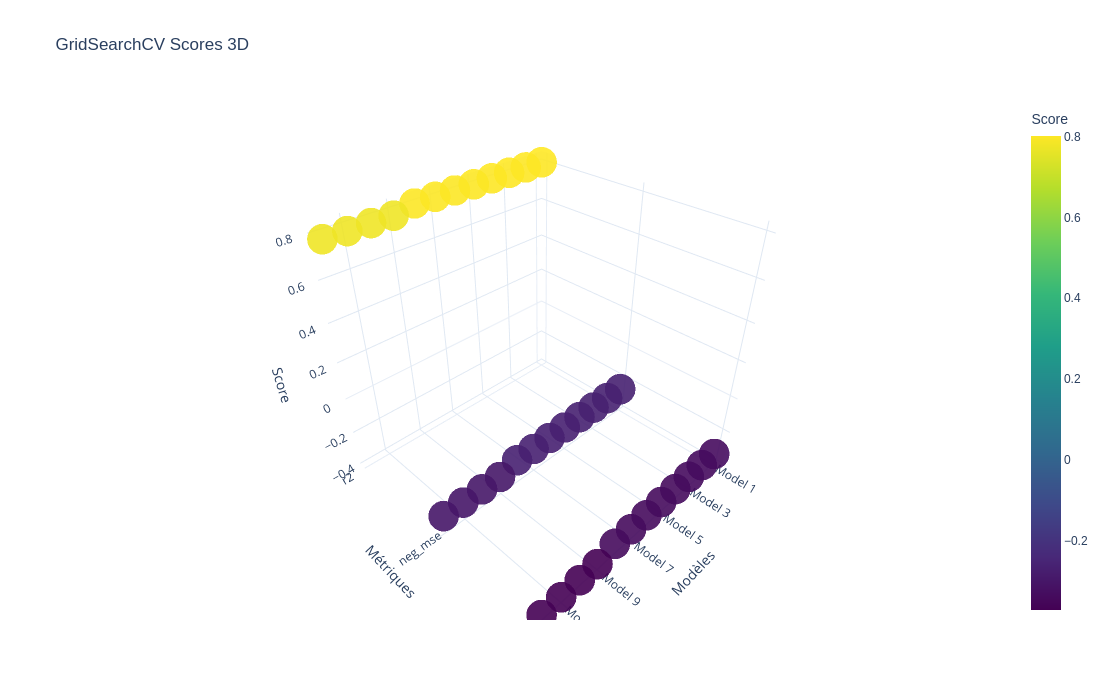

[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=100; total time=   0.2s
[CV] END rf__max_depth=None, rf__min_samples_split=2, rf__n_estimators=160; total time=   0.3s
[CV] END rf__max_depth=None, rf__min_samples_split=5, rf__n_estimators=100; total time=   0.2s
[CV] END rf__max_depth=None, rf__min_samples_split=5, rf__n_estimators=160; total time=   0.3s
[CV] END rf__max_depth=None, rf__min_samples_split=10, rf__n_estimators=140; total time=   0.2s
[CV] END rf__max_depth=10, rf__min_samples_split=2, rf__n_estimators=100; total time=   0.2s
[CV] END rf__max_depth=10, rf__min_samples_split=2, rf__n_estimators=140; total time=   0.2s
[CV] END rf__max_depth=10, rf__min_samples_split=5, rf__n_estimators=100; total time=   0.2s
[CV] END rf__max_depth=10, rf__min_samples_split=5, rf__n_estimators=160; total time=   0.3s
[CV] END rf__max_depth=10, rf__min_samples_split=10, rf__n_estimators=120; total time=   0.2s
[CV] END rf__max_depth=10, rf__min_samples_split=10, rf__n

In [23]:
top_n=20
df = pd.DataFrame(grid_search.cv_results_)

# Récupérer les métriques
metrics = [col.replace('mean_test_', '') for col in df.columns if col.startswith('mean_test_')]
if not metrics:
    raise ValueError("Aucune métrique trouvée dans cv_results_.")

# Trier par meilleure métrique principale
main_metric = metrics[0]
df = df.sort_values(f'mean_test_{main_metric}', ascending=False).head(top_n)

# Labels modèles
model_labels = [f"Model {i+1}" for i in range(len(df))]
df['hover_text'] = df['params'].apply(lambda p: ', '.join(f"{k}={v}" for k,v in p.items()))

# Construire X, Y, Z
x, y, z, text, color = [], [], [], [], []
for i, metric in enumerate(metrics):
    for j in range(len(df)):
        x.append(model_labels[j])
        y.append(metric)
        z.append(df[f'mean_test_{metric}'].iloc[j])
        text.append(df['hover_text'].iloc[j])
        color.append(df[f'mean_test_{metric}'].iloc[j])

fig = go.Figure(data=[go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(
        size=10,
        color=color,
        colorscale='Viridis',
        colorbar=dict(title='Score'),
        opacity=0.9
    ),
    text=text,
    hovertemplate='Model: %{x}<br>Métrique: %{y}<br>Score: %{z:.3f}<br>Params: %{text}<extra></extra>'
)])

fig.update_layout(
    title="GridSearchCV Scores 3D",
    scene=dict(
        xaxis_title='Modèles',
        yaxis_title='Métriques',
        zaxis_title='Score',
    ),
    template='plotly_white',
    height=700
)

fig.show()

In [55]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [56]:
best_model

,steps,"[('scaler', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,200
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2


In [57]:
best_params

{'rf__max_depth': 20, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}

In [58]:
best_score

0.8019263223659057

Prédictions

In [59]:
y_pred = best_model.predict(X_test) # Prédicitons sur les données de test

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


Performances du modèle 

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

La classification_report n'est pas supportée pour les valeur continues

# [Isolation forest (Fei Tony Liu, 2008)](src/paper/IsolationForest/Isolation_Forest.pdf)
---
### 1. Isolation Tree

L'isolation forest reprend le principe de la random forest pour la détection d'anomalies. Le paradigme est le suivant : plus un point est considéré comme une anomalie, plus il est facile à isoler du reste du nuage de points. Pour mesurer le taux d'isolation d'un point dans le *dataset*, on attribue à chauqe points un score de . Pour rappel, on distingue trois types de valeurs pour la détection d'anomalies :

* **Valeur extrême** : valeur minimale ou maximale prise par le dataset. Valeur physiquement réalisable mais rare (ex : 40°C en été)
* **Valeur abérrante** : valeur physiquement invraisemblable. (ex : température sur la Terre de 752°C)
* **Anomalie** : valeur physiquement acceptable mais pas dans ce contexte (exemple : température de 30°C en hiver)

Dans notre cas, on cherche uniquement à détecter les anomalies. On se trouve donc dans un problème de classification binaire non supervisé. 